# Generalized linear models (GLMs) of neural responses

<div class="alert alert-block alert-info">

Lesson time: 60 m   
Contributors: Arne Meyer, Davide Spalla

---
### In this lesson you will learn:
- What Generalzied Linear Models (GLMs) are.
- How GLMs can be used to model the response to single neurons to different stimuli.
- What is the difference between a linear and a non-linear activation function, and how poissonian activation can be used to model important features of neural responses.



## Introduction
---
 
In this lesson you will learn how to model the response of a neuron as a function of an external stimulus using [Generalized linear models (GLM)](https://en.wikipedia.org/wiki/Generalized_linear_model).

These concept will be particularly useful in the study of early sensory processes, where the activity of single neurons can be well carachterized as as an **input-output function** – taking a sensory stimulus (such as an pattern of photons hitting our retina, or the mechanical vibrations that we pereive as sounds) and producting a pattern of actvity.   

This phenomenon can be studied with many different tools: tuning curves (ref), ... to name a few. 
In this lesson we will focus on GLM, a class of simple but powerful models that can be use to describe how a the firing rate of a neuron depends on the value of sensory stimuli.





## Stimulus-response functions
---
A major challenge with characterizing neural responses to sensory stimuli is that the possible space of inputs is very large, possibly infinite. An example from the auditory field might help to illustrate the problem. Imagine that you have a piano with 88 keys and you want to understand how a neuron in the auditory cortex is processing sounds (here: the tones that are generated when pressing one or more piano keys). All sensory neurons are more or less nonlinear. Thus the neural response to the combination of keys C1 and E1 is not the same as the sum of C1 or E1 when presented alone. As a consequence, probing the neuron with all possible key combinations would require $2^{88} - 1$ "stimuli". Even if we fix the duration of each stimulus to 1 second and use the same sound level this would exceed the lifetime of any species used to study these principles in the laboratory. Thus, we have to do something smarter.


**Generalized linear models (GLMs)**


An alternative approach is to use a statistical model that seeks to characterize response to complex stimuli. 
This allows us to restrict the shape that the neural response can take to a much smaller hypothesis space, using some assumption on the kind of function that the neuron implements

GLMs are a powerful and popular set of such statistical models, that hypothesizes that the neural responses is a result of two stages: a linear filter of the input and a static non-linearity.

**1. Linear Stage**

The **linear stage** consists of one or more **linear filters** represented by the vectors $\mathbf{k}_1, \mathbf{k}_2, ...$ that describes how a neuron is integrating stimulus features (defined below). In this leson we will focus on models with a single filter $\mathbf{k}$. The linear filters are linked to the concept of a **receptive field (RF)** and indeed both terms are used interchangeably. Broadly speaking, the RF is a portion of **sensory space** that can elicit neuronal responses when stimulated. For example, a neuron in the visual cortex that elicits an action potential when an object appears in the upper left visual field is said to have a RF at that location. For a visual neuron, the sensory space is typically 2-dimensional (e.g., a x/y positions of pixels on a display used in laboratory settings) or 3-dimensional (e.g., pixel x/y positions that change over time). The precise geometry of the sensory space does often not matter. Instead, we treat every "element" (e.g., a pixel of an image) of this space as a single dimension in a usually high-dimensional "feature" space (see above image) and write the stimulus as a vector 

$$
\mathbf{s} = (s_1, s_2, s_3, ..., s_D)^T.
$$

The output of the linear stage is simply the dot product of the linear filter and the stimulus:

$$
x = \mathbf{k}^T \mathbf{s} = \sum_{i=1}^D k_i s_i.
$$

Thus, the entries in the vector $\mathbf{k}$ can be interpreted as the weights that a neuron gives to different stimulus features. For the visual neuron mentioned above, the weights would be non-zero for a pixel values in the upper left visual field, and zero otherwise. It is exactly this **simple interpretation of model parameters in the original stimulus space** that makes GLMs so appealing and is one or the main reasons why it is extremely popular in neural coding. 

**2. Nonlinear Stage**

The nonlinear stage that transforms the linearly filtered stimulus $x$ into a spike rate using a static, memoryless nonlinearity $f$. The output of the nonlinear stage for a single filter is given by $f(\mathbf{k}^T\mathbf{s})$. For dynamically fluctuating stimuli, the time-varying output of the LN model can simply be described by $f(\mathbf{k}^T\mathbf{s}_t)$ where $\mathbf{s}_t$ is the stimulus at discrete time step $t$.

The type of non-linearity uses in the non-linear stage defines the different kind of GLM
In this lesson, we will discuss the **linear-Gaussian model** and the **linear-nonlinear Poisson model**.


### Linear-Gaussian models
---

In the simplest case the response is assumed to be modeled directly by the output of a single filter, possibly with a constant offset response:

$$
    r_t = \mathbf{k}^T \mathbf{s}_t + r_0 + \mathcal{N}(0, \sigma^2)
$$

where response variability (which inevatibly arises in neural data) is Gaussian-distributed with constant variance $\sigma^2$ around the filter output. The constant offset term $r_0$ can be conveniently absorbed into the RF vector $\mathbf{k}$ by setting an additional dimension in the stimulus vector $\mathbf{s}_t$ to 1 at all times, so that the offset becomes the coefficient associated with this added dimension. Thus, we will typically omit explicit reference to (and notation of) the offset term.

Given a stimulus and a measured response, estimated filter weights $\hat{\mathbf{k}}$ can be obtained by minimizing the squared difference between the model output and the measured data:

\begin{equation}
\hat{\mathbf{k}} = \underset{k}{\mathrm{argmin}} \sum_{t=1}^{N} || r_t - \mathbf{k}^T \mathbf{s}_t||^2 = (\mathbf{S}^T\mathbf{S})^{-1}\mathbf{S}^T\mathbf{r}
\end{equation}

where $\mathbf{S}$ is the stimulus design matrix formed by collecting the stimulus vectors as rows, $\mathbf{S} = (\mathbf{s}_1, \mathbf{s}_2, ..., \mathbf{s}_N)^T$ and $\mathbf{r}$ is a column vector of corresponding measured responses. The matrix product $\mathbf{S}^T \mathbf{r}$ gives the sum of all stimuli that evoked spikes (with stimuli evoking multiple spikes repeated for each spike in the bin); if divided by the total number of spikes this would be the spike-triggered average (STA) stimulus. The term $\mathbf{S}^T \mathbf{S}$ is the stimulus auto-correlation matrix; pre-multiplying by its inverse removes any structure in the STA that might arise from correlations between different stimulus inputs, leaving an estimate of the RF filter. 

More generally, the above equations corresponds to the maximum likelihood estimator (MLE) for a model in which response variability is Gaussian-distributed with constant variance around the filter output $x_t$ (for details see the review paper mentioned above).

Before we start with the linear model, we define a number of helper functions to that are generally useful for data generation throughout the assignment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


Let's see the gaussian-linear model in action. We'll generate some data by modeling the response of a neuron to a sequence of visual stimuli.
We'll model the visual field as a 2D matrix of a certain size in terms of number of pixels.
Our stimulus will consists of gaussian noise, spread around the visual field, presented for 10 seconds at a rate of 10 Hz.


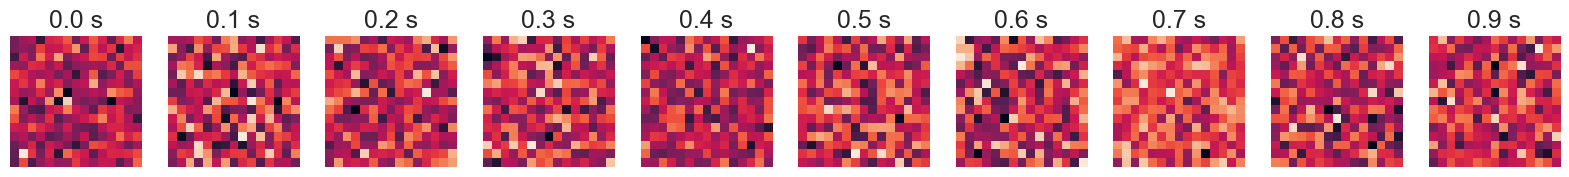

In [2]:
duration = 50.
dt = .1
std_dev = 1
vf_size = (15,15)
n_bins = round(duration / float(dt))


S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

# plot the first second of stimuli
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(S[i])
    plt.axis('off')
    plt.title(f'0.{i} s')


Then we create the receptive field for our neuron. The code below creates a [gabor filter](https://en.wikipedia.org/wiki/Gabor_filter), soemtimes referred to as gabor patch. It is defined by a sinusoidal wave multiplied by a gaussian function, and it is often used to study the selectivity of cells in the early visual cortex.
At the beginning of the code cell below you will find the list of the parameters that define the gabor patch: play around with them and see what aspect of the receptive field they control 


Text(0, 0.5, 'y')

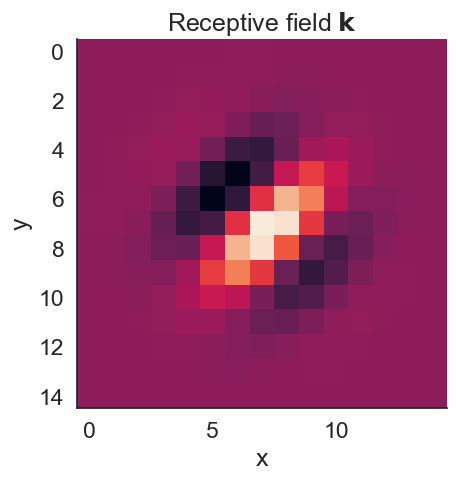

In [3]:
size = vf_size # size in pixel of our receptive field
mu = (8, 8) # center of the gabor pathc
sigma = (4,4) #size of the gabor patch
angle = 45 # orientation of the gabor patch
frequency = .085 # spatial frequency of the gabor patch
phase = 0 # pahse of the gabor pathc


xx, yy = np.meshgrid(1. + np.arange(size[0]),
                         1. + np.arange(size[1]))

# Gaussian envelope
G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
            - np.power(yy - mu[1], 2) / (2. * sigma[1]))

# spatial modulation
phi = np.deg2rad(angle)
xxr = xx * np.cos(phi)
yyr = yy * np.sin(phi)
xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
Sn = np.cos(xyr + phase)

K = G * Sn
K /= np.amax(np.abs(K))

plt.imshow(K)
plt.title(r'Receptive field $\bf{k}$')
plt.xlabel('x')
plt.ylabel('y')

By building our receptive field in this way, we are enforcing the assunption that this cell will be maximally responsive to visual stimuli that have a certain orientation (the same as `angle`), a certain spatial frequency (the same as `frequency`), and are localized around a point in the visual field (whose coordinate are given by `mu`)

Let's now generate our neural responses using a gaussian-linear response function

In [4]:
noise_variance = 1
offset = 2.

# flatten the matrices in to 1d array for convenience
K_flat = K.ravel()
K_flat = np.hstack((K.flat, offset))

S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


# 1. linear stage
ks = np.dot(K_flat, S_flat.T)

# 2. nonlinear stage (for a linear model: f -> identity function)
rate = ks

# add Gaussian noise centered around the "true" rate for each bin
rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)

We can visualize the timecourse of the firing rate, and of the input current. In this case we they will be the same, a part from the additive gaussian noise we injected to the rate in the last line of our simulation.

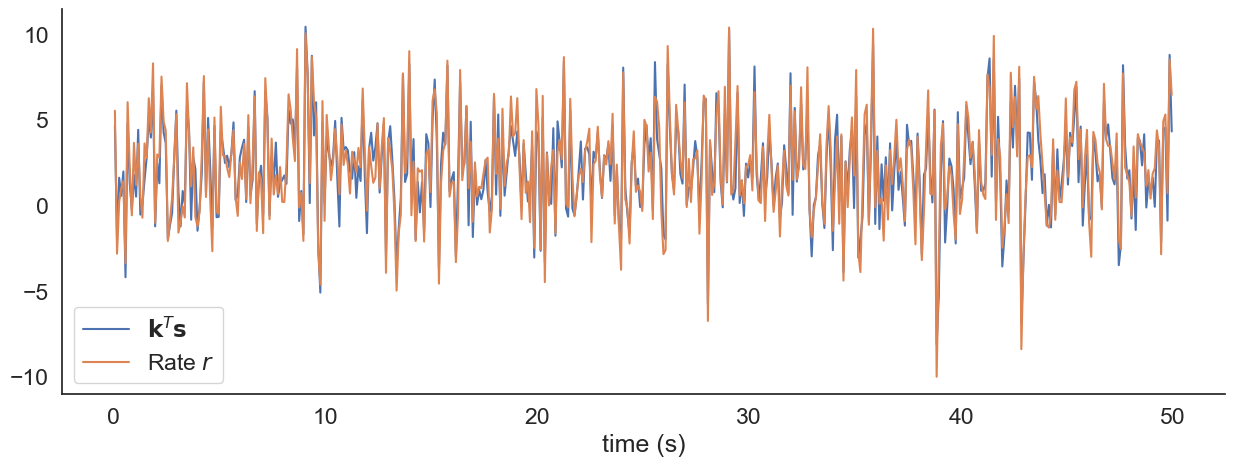

In [5]:
plt.figure(figsize=(15,5))
t = (.5 + np.arange(n_bins)) * dt # bin centers
plt.plot(t, ks, '-',
       label=r'$\mathbf{k}^T\mathbf{s}$')
plt.plot(t, rate, '-',
       label=r'Rate $r$')
plt.xlabel('time (s)')
plt.legend()

And we can visualize the relationship between rate and input by plotting one against the other:

Text(0, 0.5, 'Rate $r$')

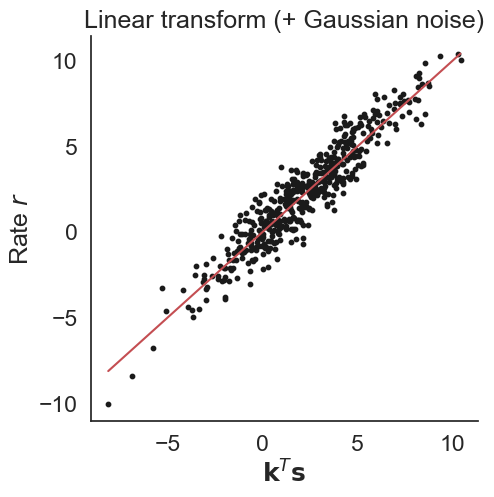

In [6]:
plt.figure(figsize=(5,5))
plt.title('Linear transform (+ Gaussian noise)')
xx = np.linspace(ks.min(), ks.max(), 100)
plt.plot(xx, xx, 'r-') # relationship between input and output
plt.scatter(ks, rate, s=10, c=[3*[.1]])
plt.xlabel(r'$\mathbf{k}^T \mathbf{s}$')
plt.ylabel(r'Rate $r$')

**Fitting the GLM**

We can now apply the ordinary least square procedure we saw in the introduction to estimate the parameters of the linear filter $K$, and compare the output of this procedure with the true filter, the one that generated the data.


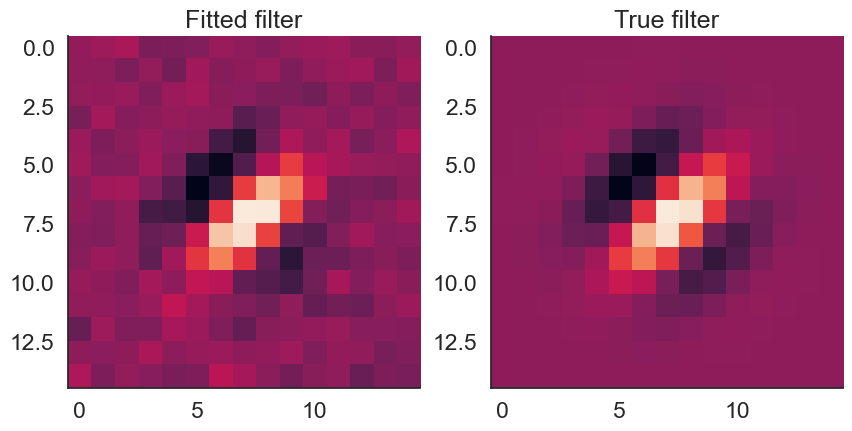

In [7]:
#S_flat = S_flat.T
K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
K_hat = K_hat[:-1].reshape(vf_size)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Fitted filter')
plt.imshow(K_hat)
plt.subplot(1,2,2)
plt.title('True filter')
plt.imshow(K)

We can reconstruct the shape of the neuron's receptive field, with some accuracy. In the [exercises](exercises.ipynb) notebook you will have the chance to explore how the quality of this estimation depends on the the size and features of the data.

The model we have used is a simple linear one, but the activity of neurons is highly non-linear: a neuron only fires when it's membrane potential reaces a certain threshold. In what follwos we will include this feature in our model.

### Linear-nonlinear Poisson models
---

For spike-train responses, a natural first assumption is that spike times are influenced only by the stimulus, and are otherwise entirely independent of one another. This assumption requires that the distribution of spike times be governed by a **Poisson (point) process conditioned on the stimulus**, defined by an **instantaneous rate function**

$$
    \lambda_t = f(\mathbf{k}^T \mathbf{s}_t)
$$ 

(often also called intensity function). In turn, this means that the distributions of counts within response time bins of size $\Delta$ must follow a Poisson distribution

\begin{equation}
  P(r_t | \mathbf{s}_t, \mathbf{k}) = \frac{(\lambda_t\Delta)^{r_t}}{r_t!} e^{-\lambda_t\Delta}
\end{equation}

where $\lambda_t\Delta$ is the expected number of spikes in a small unit of time $\Delta$ and $\lambda_t$ is the rate (or intensity) of the Poisson process. As for the linear-Gaussian model, a constant offset term $r_0$ can be conveniently absorbed into the RF vector $\mathbf{k}$ by setting an additional dimension in the stimulus vector $\mathbf{s}_t$ to 1 at all times.

If $f$ is assumed to be monotonic and fixed (rather than being defined by parameters that must be fit along with the RF) then the above equation describes an instance of a **generalized linear model (GLM)** (Nelder and Wedderburn, 1972), a widely-studied class of regression models. Many common choices of $f$ result in a likelihood which is a concave function (Paninski, 2004), guaranteeing the existence of a **single optimum** that can easily be found by standard optimization techniques such as gradient ascent or Newton's method. The GLM formulation can also be extended to non-Poisson processes, by including probabilistic interactions between spikes in different bins that may be often reminiscent of cellular biophysical processes. However, here we will focus on a Poisson GLM without spike bin interactions.


**Generating data with a poisson GLM**

Let's generate the spiking activity of a poisson neuron with a linear recevtive field. We will use the same gaussian stimuli (re-generated to a duration of 100s) and the same linear filter $\textbf{k}$ of the first part of the lesson. What will change the static non-linearity of the second stage.  

In [8]:
# genration of the stimulus 

duration = 100.
dt = .1
std_dev = 1
vf_size = (15,15)
n_bins = round(duration / float(dt))


S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

Let's define a function to generate spikes given a firing rate $\lambda$ and a time interval $dt$.

In [9]:
def generate_inhomogeneous_poisson_spikes(lamda, dt):

    n_bins = lamda.shape[0]
    bins = np.arange(n_bins+1)*dt

    # generate Poisson distributed numbers for all bins with the max. intensity (lamda_max)
    lamda_max = np.max(lamda)
    poisson_numbers = np.random.poisson(lamda_max, size=n_bins)

    # throw away numbers depending on the actual intensity ("thinning")
    spike_times = []
    prob = lamda / lamda_max
    for i in range(n_bins):
        
        # number of spikes to keep in this bin
        n = np.sum(np.random.rand(poisson_numbers[i]) < prob[i])
        n_s = int(round(n * dt))

        # generate random spike times in this bin
        ts = bins[i] + np.random.rand(n_s)*dt

        spike_times.extend(ts)

    return np.asarray(spike_times)

And now let's generate our data

In [10]:
spike_rate = 5 # average firing rate 

# flatten the matrices in to 1d array for convenience
K_flat = K.ravel()
K_flat = np.hstack((K.flat, offset))

S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


# 1. linear stage
ks = np.dot(K_flat, S_flat.T)

# 2. nonlinear stage (for a linear model: f -> identity function)
lamda = np.exp(ks)

# lamda * dt is the number of spikes in the different bins (but keep in mind that the Poisson process
# is a stochastic process so the actual number will differ for every draw). Thus, the sum of the product 
# across all bins gives the expected number of spikes for the whole draw.
expected_rate = np.sum(lamda*dt) / duration
lamda *= (spike_rate / expected_rate)

# generate spike times using an inhomogeneous Poisson process
spike_times = generate_inhomogeneous_poisson_spikes(lamda, dt)

# compute spike counts in the different time bins
spike_counts = np.histogram(spike_times,
                            bins=np.arange(n_bins+1)*dt)[0]

print("average spike rate: %0.2f spikes per second" % (len(spike_times) / duration))

average spike rate: 4.74 spikes per second


Let's look at the timecourse of our data

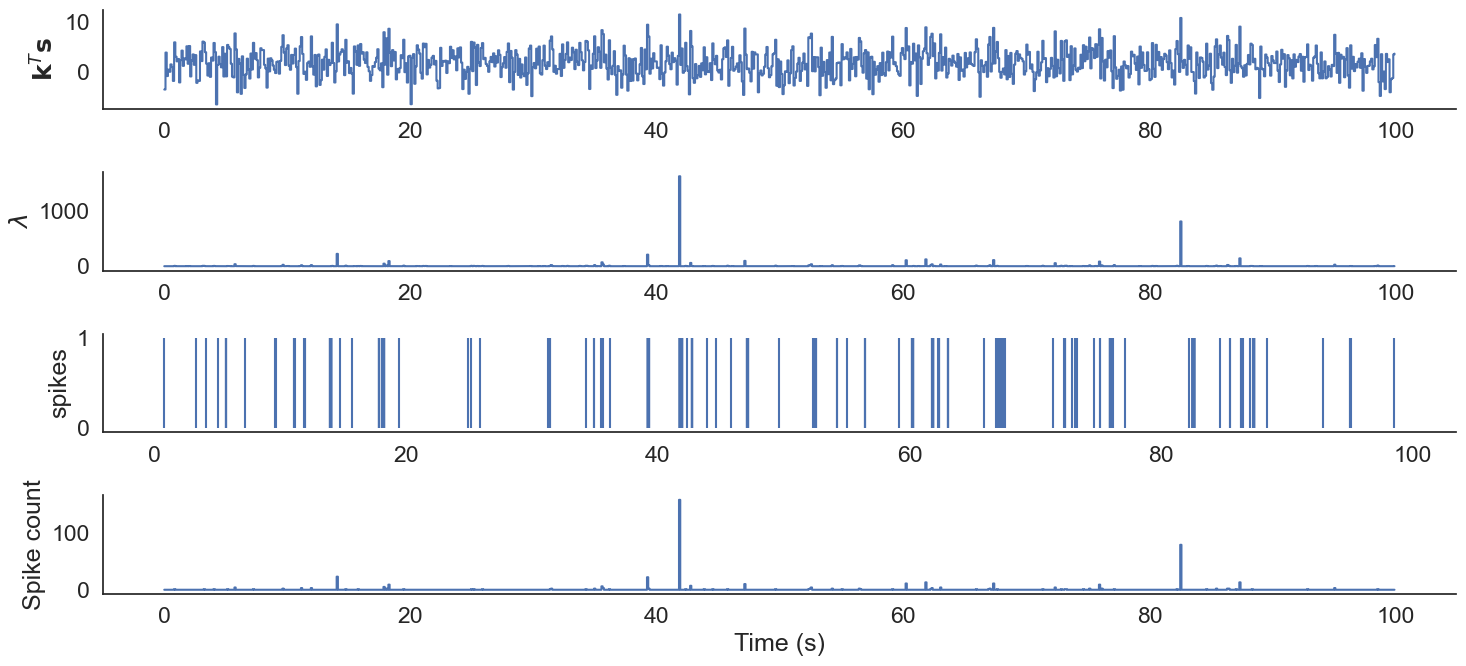

In [11]:
# Show response

plt.figure(figsize=(15,7))

n_bins = lamda.shape[0]
t = np.arange(n_bins) * dt

plt.subplot(4,1,1)
plt.step(t, ks, where='post')
plt.ylabel(r'$\mathbf{k}^T \mathbf{s}$')

plt.subplot(4,1,2)
plt.step(t, lamda, where='post')
plt.ylabel(r'$\lambda$')

plt.subplot(4,1,3)
plt.vlines(spike_times, 0, 1)
plt.ylabel('spikes')

plt.subplot(4,1,4)
plt.step(t, spike_counts, where='post')
plt.xlabel('Time (s)')
plt.ylabel('Spike count')

plt.tight_layout()

And at the non-linear relationship between input and output in our model

Text(0, 0.5, 'f($\\mathbf{k}^T \\mathbf{s})$')

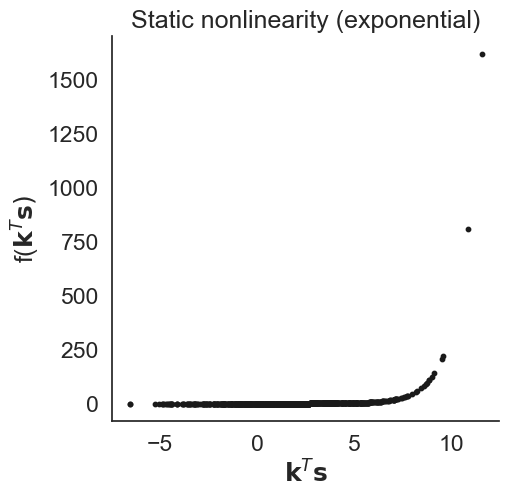

In [12]:
plt.figure(figsize=(5,5))
plt.title('Static nonlinearity (exponential)')
plt.scatter(ks, lamda, s=10, c=[3*[.1]])
plt.xlabel(r'$\mathbf{k}^T \mathbf{s}$')
plt.ylabel(r'f($\mathbf{k}^T \mathbf{s})$')

**Fitting a linear-non linear poisson GLM**

The log-likelihood function and its derivative w.r.t $\mathbf{k}$ for a LNP model with exponential nonlinearity $f(\mathbf{k}^T \mathbf{s}) \equiv e^{\mathbf{k}^T \mathbf{s}}$ can be computed as follows: 
  
Log-likelihood for a single observation (at time $t$):

\begin{equation}
    \log P(r_t | \lambda_t) = r_t\log \lambda_t + r_t\log \Delta - \log r_t! - \lambda_t \Delta.
\end{equation}

Thus the log-likelihood for the whole spike sequence is given by

\begin{equation}
    \log P(R | \lambda) = \sum_t r_t\log \lambda_t + \sum_t r_t\log \Delta - \sum_t \log r_t! - \sum_t \lambda_t \Delta.
\end{equation}

The derivative w.r.t to $\mathbf{k}$ is

\begin{align}
    \frac{\partial{\log P}}{\partial{\mathbf{k}}} &= \sum_t \frac{\partial{r_t \log \lambda_t}}{\partial{\mathbf{k}}} + \sum_t \frac{\partial{r_t \log \Delta}}{\partial{\mathbf{k}}} - \sum_t \frac{\partial{r_t \log r_t!}}{\partial{\mathbf{k}}} - \Delta \sum_t \frac{\partial{\lambda_t}}{\partial{\mathbf{k}}} \\
    &= \sum_t \frac{\partial{r_t \log \lambda_t}}{\partial{\mathbf{k}}} - \Delta \sum_t \frac{\partial{\lambda_t}}{\partial{\mathbf{k}}}
\end{align}

and with $\frac{\partial{\lambda_t}}{\partial{\mathbf{k}}} = \mathbf{s}\lambda_t$

\begin{equation}
\frac{\partial{\log P}}{\partial{\mathbf{k}}} = \sum_t r_t \mathbf{s}_t - \Delta \sum_t \mathbf{s}_t \lambda_t
\end{equation}

Let's fit the linear-nonlinear model. For the exponential nonlinearity, the log-likelihood is a concave function, and therefore the parameters can be found using [gradient descent]() to look for the configuration of the parameteres that *minimize the  negative log-likelihood*  (which is equivalent to maximizing the log-likelihood). 

The scipy package provides the [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function that can be used to this purpose. The minimize function supports a number of algorithms. As we can explicitly compute the gradient for this type of LNP model, algorithms that make use of the gradient are prefered as they are particularly fast, e.g., `method='Newton-CG'`. We will pass the function to compute the gradient as a keyword agument: `jac=my_gradient_function`. We will initialize the RF parameters using the spike-triggered average (STA)
$$
 k_\mathrm{STA} = \frac{\mathbf{S}^T \mathbf{r}}{n_\mathrm{spikes}}
$$
where $n_\mathrm{spikes}$ is the total number of spikes in $\mathbf{r}$. 

**Note:** the exponential nonlinearity is very sensitive to the scaling. To avoid numerical issues we initialize the RF parameters with $\mathbf{k}_\mathrm{init} = \frac{\mathbf{k}_\mathrm{STA}}{10}$.

In [13]:
from scipy.optimize import minimize

# define functions for minimisation
def cost(k, spike_counts, S,alpha=1):
    #negative loglikelihood function to minimize
    ks = np.dot(k, S.T)
    lamda = np.exp(ks)
    return -np.dot(spike_counts, ks) + dt * np.sum(lamda)
    
    
def grad(k, spike_counts, S):
    # expression of the gradient of the negative log likelihood (note the sign is flipped accordingly)

    ks = np.dot(k, S.T)
    lamda = np.exp(ks)
    return -np.dot(S.T, spike_counts - dt*lamda)

k_STA = np.inner(S_flat.T, spike_counts) / np.sum(spike_counts)
res = minimize(fun = cost, x0 = k_STA / 10, args = (spike_counts, S_flat), method = 'Newton-CG', jac = grad)

K_est = res.x

print("Pearson correlation = {:.3f}".format(np.inner(K.ravel(), K_est[:-1]) / (np.linalg.norm(K.ravel()) * np.linalg.norm(K_est[:-1]))))




Pearson correlation = 0.801


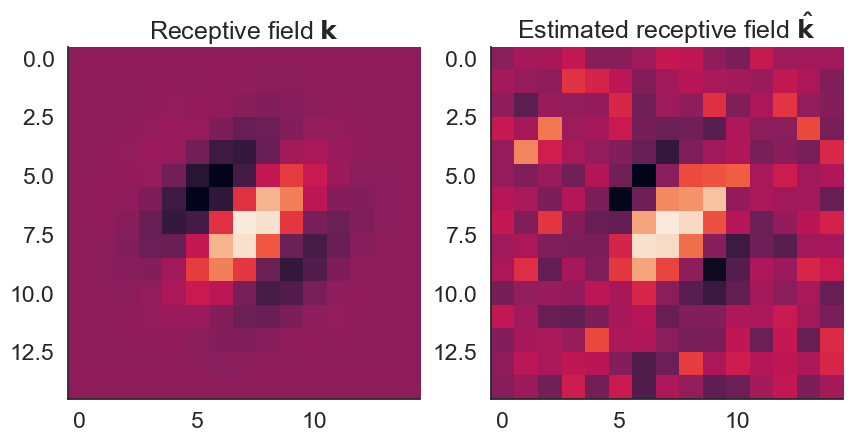

In [14]:
# show result
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title(r'Receptive field $\mathbf{k}$')
plt.imshow(K)

plt.subplot(1,2,2)
plt.title(r'Estimated receptive field $\mathbf{\hat{k}}$')
plt.imshow(K_est[:-1].reshape(15, 15)) 



<div class="alert alert-block alert-info">

### Regularization

As you can see from the plots above, the fitting porcedure we use tents to overestimate the contribution of small values of $\textbf{k}$.  
This can be partially prevented by adding a [**regularization**](https://en.wikipedia.org/wiki/Regularization_(mathematics)) term to our cost function, a very popular technqique to constrain models in Machine Learning.
It can be done in a number of ways, let's look at two of the most popular:

**L1 regularization (or Lasso)**
We add a term to our cost function that is proportional of the sum of the **absolute values** of the parameters of our model:

$$r = \alpha \sum_{k \in \textbf{k}} |k|$$

This term penalizes too large values of $k$, and promotes *sparsity* (only a subset of the parameters will give a significant contribution)


**L2 regularization (or Ridge)**
We add a term to our cost function that is proportional of the sum of the **squares** of the parameters of our model:

$$r = \alpha \sum_{k \in \textbf{k}} k^{2}$$

This term also penalizes too large values of $k$, with an effect that is impacting disproportionately the largest ones. 


Try and add a regularization term to the fitting procedure, and see if what effect it has on the results. (Note that you should modify both the cost function and its gradient in our case)

Our fitting procedure yields a farily good estimate of the receptive field.  

In the [exercises](exercises.ipynb) you'll have the chance to explore how this estimation is affected by the quantity and quality of the data.

<div class="alert alert-block alert-info">

### Key points 

- GLMs are statistical models of neural responses
- They consist of a linear filter and a static non-linearity
- GLMs receptive fields shows to which part of the stimulus space a neuron responds preferentially

<div class="alert alert-block alert-info">

### References and resources

**Books & papers**
* A review on stimulus-response analysis: https://www.frontiersin.org/articles/10.3389/fnsys.2016.00109/full
* A review on receptive-fields identification: https://www.annualreviews.org/doi/10.1146/annurev-neuro-062012-170253 

**Websites & blogposts**


**Software**
* statsmodels offers an API for GLMs in python: https://www.statsmodels.org/stable/glm.html

## Exercises
You can find the exercises for this lessons in [exercises.ipynb](exercises.ipynb)